# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

In [10]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [11]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

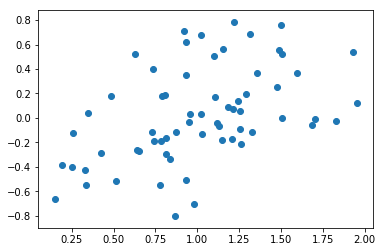

In [12]:
# x1→y
plt.scatter(x.T[0], y)

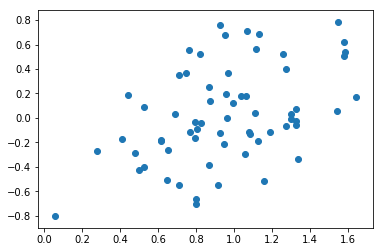

In [13]:
# x2→y
plt.scatter(x.T[1], y)

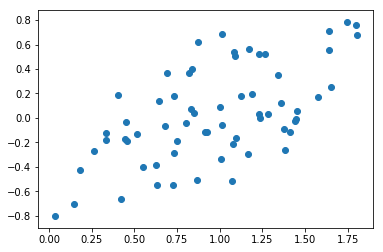

In [14]:
# x3→y
plt.scatter(x.T[2], y)

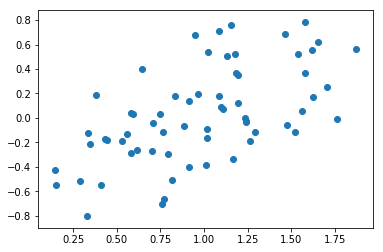

In [15]:
# x4→y
plt.scatter(x.T[3], y)

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

# $\beta = (X^T X)^{-1} Y^T X$

In [16]:
beta = np.linalg.lstsq(x, y)[0]
beta

array([ 0.11308905,  0.10051588,  0.30767816,  0.23822765, -0.71483096])

# Model:
# $ y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4$
# $ y = -0.813 + 0.0951X_1 + 0.198X_2 + 0.239X_3 + 0.280X_4 $

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

In [17]:
pred = np.dot(x, beta)

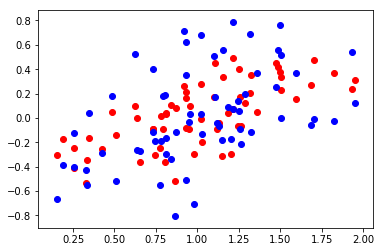

In [18]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

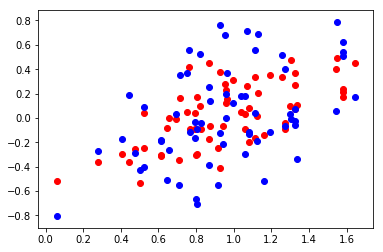

In [19]:
pred_1d = np.dot(x, beta)

plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [21]:
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [84]:
# Set Y to Rating
y_credit = credit['Rating']

In [91]:
# Model 1: Income, Age
x_m1 = credit[['Income', 'Age']].as_matrix()

x_m1 = np.vstack([x_m1.T, np.ones(len(x_m1))]).T
x_m1

array([[  14.891,   34.   ,    1.   ],
       [ 106.025,   82.   ,    1.   ],
       [ 104.593,   71.   ,    1.   ],
       ..., 
       [  57.872,   67.   ,    1.   ],
       [  37.728,   44.   ,    1.   ],
       [  18.701,   64.   ,    1.   ]])

In [92]:
# Betas for Model 1
beta_m1 = np.linalg.lstsq(x_m1, y_credit)[0]
beta_m1

array([   3.50245506,   -0.32939018,  214.89921532])

# Model 1:
# $ y = \beta_0 + \beta_1X_1 + \beta_2X_2 $
# $ y = 214.899 + 3.502X_1 - 0.329X_2$

In [94]:
# Predicted values for Model 1
pred_m1 = np.dot(x_m1, beta_m1)

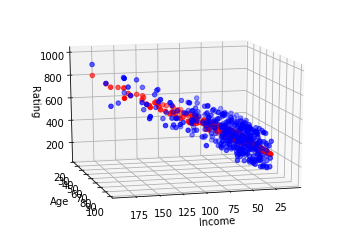

In [96]:
# Model 1 Plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(15, 75)
ax.scatter(x_m1.T[0], x_m1.T[1], pred_m1, zdir='z', c='r')
ax.scatter(x_m1.T[0], x_m1.T[1], y_credit, zdir='z', c='b')
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Rating')

In [97]:
# Model 2: Credit Limit, No. of Cards, Credit Balance
x_m2 = credit[['Limit','Balance']].as_matrix()

x_m2 = np.vstack([x_m2.T, np.ones(len(x_m2))]).T
x_m2

array([[  3.60600000e+03,   3.33000000e+02,   1.00000000e+00],
       [  6.64500000e+03,   9.03000000e+02,   1.00000000e+00],
       [  7.07500000e+03,   5.80000000e+02,   1.00000000e+00],
       ..., 
       [  4.17100000e+03,   1.38000000e+02,   1.00000000e+00],
       [  2.52500000e+03,   0.00000000e+00,   1.00000000e+00],
       [  5.52400000e+03,   9.66000000e+02,   1.00000000e+00]])

In [99]:
# Betas for Model 2
beta_m2 = np.linalg.lstsq(x_m2, y_credit)[0]
beta_m2

array([  6.57875811e-02,   6.03409109e-03,   4.02585132e+01])

In [101]:
beta_m2_obj = beta_m2.astype(object)
beta_m2_obj

array([0.06578758106490043, 0.006034091092188332, 40.258513229775915], dtype=object)

# Model 2:
# $ y = \beta_0 + \beta_1X_1 + \beta_2X_2 $
# $ y = 40.258 + 0.0657X_1 - 0.00603X_2$

In [106]:
# Predicted values for Model 2
pred_m2 = np.dot(x_m2, beta_m2)

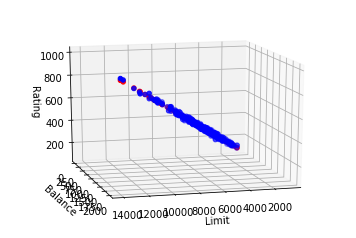

In [107]:
# Model 2 Plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(15, 75)
ax.scatter(x_m2.T[0], x_m2.T[1], pred_m2, zdir='z', c='r')
ax.scatter(x_m2.T[0], x_m2.T[1], y_credit, zdir='z', c='b')
ax.set_xlabel('Limit')
ax.set_ylabel('Balance')
ax.set_zlabel('Rating')

In [22]:
# Model 3: All numeric variables
x_credit = credit[['Income', 'Limit','Cards', 'Age', 'Education', 'Balance']].as_matrix()

x_credit = np.vstack([x_credit.T, np.ones(len(x_credit))]).T
x_credit

array([[  1.48910000e+01,   3.60600000e+03,   2.00000000e+00, ...,
          1.10000000e+01,   3.33000000e+02,   1.00000000e+00],
       [  1.06025000e+02,   6.64500000e+03,   3.00000000e+00, ...,
          1.50000000e+01,   9.03000000e+02,   1.00000000e+00],
       [  1.04593000e+02,   7.07500000e+03,   4.00000000e+00, ...,
          1.10000000e+01,   5.80000000e+02,   1.00000000e+00],
       ..., 
       [  5.78720000e+01,   4.17100000e+03,   5.00000000e+00, ...,
          1.20000000e+01,   1.38000000e+02,   1.00000000e+00],
       [  3.77280000e+01,   2.52500000e+03,   1.00000000e+00, ...,
          1.30000000e+01,   0.00000000e+00,   1.00000000e+00],
       [  1.87010000e+01,   5.52400000e+03,   5.00000000e+00, ...,
          7.00000000e+00,   9.66000000e+02,   1.00000000e+00]])

In [23]:
y_credit = credit['Rating']

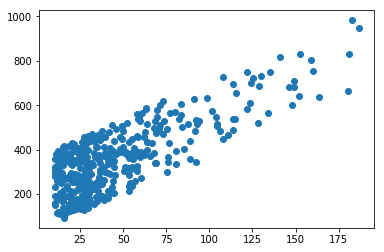

In [24]:
plt.scatter(x_credit.T[0], y_credit)

In [25]:
beta_credit = np.linalg.lstsq(x_credit, y_credit)[0]
beta_credit

array([  9.48157743e-02,   6.42304413e-02,   4.67706085e+00,
         8.06617460e-03,  -2.30863025e-01,   8.18115721e-03,
         3.10522106e+01])

In [26]:
beta_credit_obj = beta_credit.astype(object)
beta_credit_obj

array([0.09481577432067419, 0.06423044130073922, 4.677060849762247,
       0.008066174598414378, -0.2308630248280594, 0.008181157210247932,
       31.052210560648014], dtype=object)

# Model 3:
# $ y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6$
# $ y = 31.052 + 0.0948X_1 + 0.0642X_2 + 4.677X_3 + 0.00807X_4 - 0.231X_5 + 0.00818X_6 $

### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

In [82]:
pred_credit = np.dot(x_credit, beta_credit)
pred_credit[:5]

array([ 273.8922873 ,  486.53358393,  516.88616875,  675.28737617,
        359.80395292])

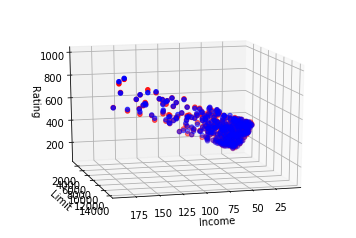

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(15, 75)
ax.scatter(x_credit.T[0], x_credit.T[1], pred_credit, zdir='z', c='r')
ax.scatter(x_credit.T[0], x_credit.T[1], y_credit, zdir='z', c='b')
ax.set_xlabel('Income')
ax.set_ylabel('Limit')
ax.set_zlabel('Rating')

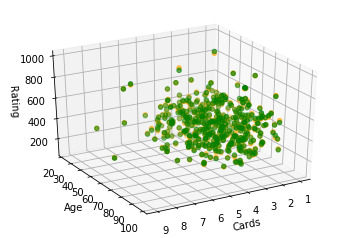

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(x_credit.T[2], x_credit.T[3], pred_credit, zdir='z', c='orange')
ax.scatter(x_credit.T[2], x_credit.T[3], y_credit, zdir='z', c='green')
ax.set_xlabel('Cards')
ax.set_ylabel('Age')
ax.set_zlabel('Rating')

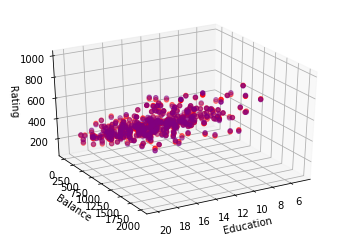

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(x_credit.T[4], x_credit.T[5], pred_credit, zdir='z', c='red')
ax.scatter(x_credit.T[4], x_credit.T[5], y_credit, zdir='z', c='purple')
ax.set_xlabel('Education')
ax.set_ylabel('Balance')
ax.set_zlabel('Rating')